In [1]:
!pip install yfinance --quiet

In [25]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt


In [17]:
data = yf.download(tickers='aapl', period='1y', interval='1h')
data.head()
                   

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-07-24 09:30:00-04:00,193.410004,194.910004,192.960007,193.729996,193.729996,12627793
2023-07-24 10:30:00-04:00,193.727798,193.820007,192.979996,193.270004,193.270004,4240973
2023-07-24 11:30:00-04:00,193.259995,193.420105,192.830002,193.164993,193.164993,8403353
2023-07-24 12:30:00-04:00,193.179993,193.250000,192.889999,192.979996,192.979996,2855093
2023-07-24 13:30:00-04:00,192.970001,193.459900,192.764999,193.244995,193.244995,3096938


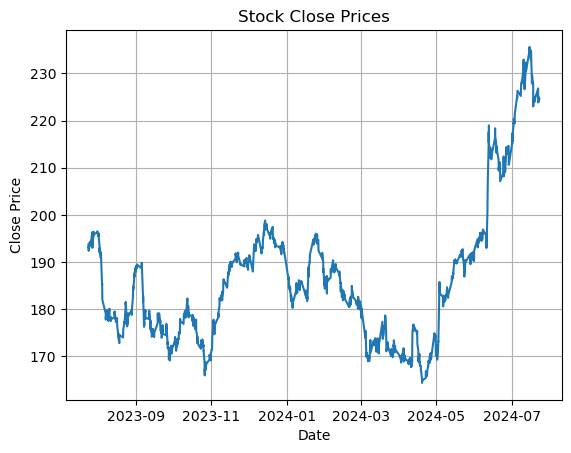

In [33]:
plt.plot(data.index, data['Close'])
plt.title('Stock Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

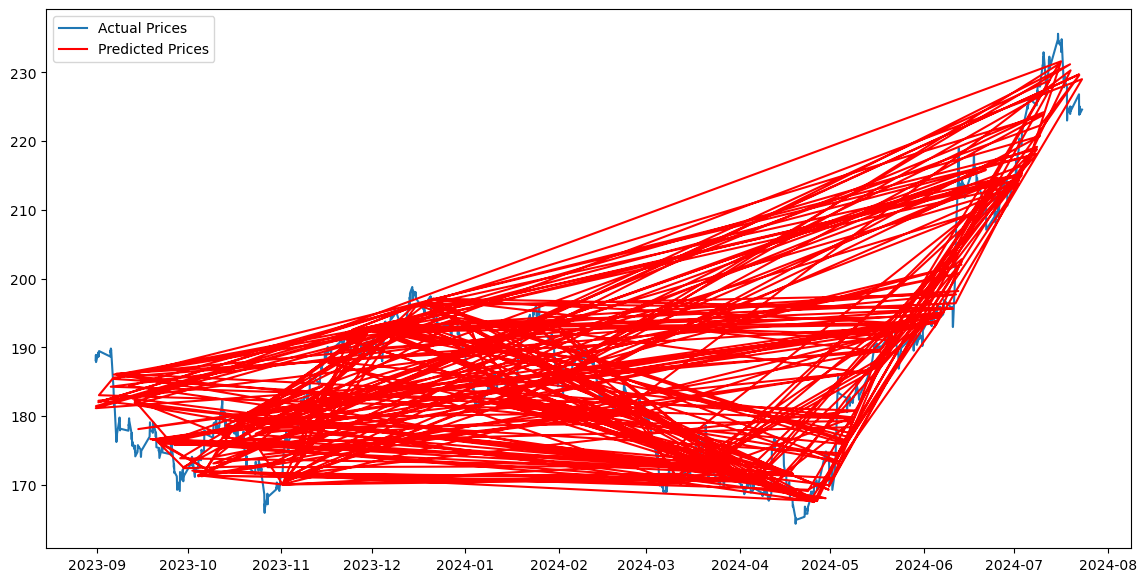

In [37]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load your stock data
# data = pd.read_csv('your_stock_data.csv') # Example data loading
# Assuming 'Date' and 'Close' columns are present

# Feature Engineering
data['SMA50'] = data['Close'].rolling(window=50).mean()
data['SMA200'] = data['Close'].rolling(window=200).mean()
data.dropna(inplace=True)

X = data[['SMA50', 'SMA200']]
y = data['Close']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Prediction
predictions = model.predict(X_test)

# Visualization
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close'], label='Actual Prices')
plt.plot(X_test.index, predictions, label='Predicted Prices', color='red')
plt.legend()
plt.show()


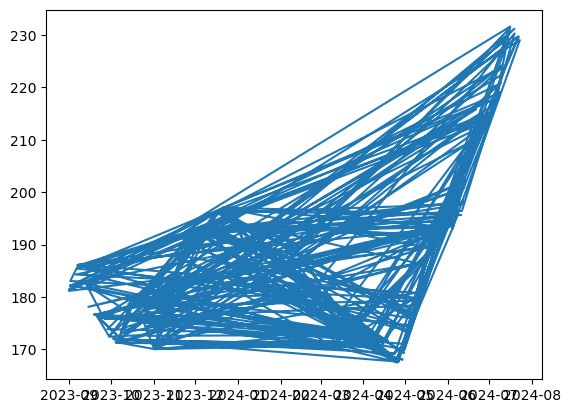

In [39]:
plt.plot(X_test.index, predictions)

In [44]:
!pip install tensorflow

C:\Users\AlexMcManus\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1491/1491 ━━━━━━━━━━━━━━━━━━━━ 52s 30ms/step - loss: 0.0060
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step


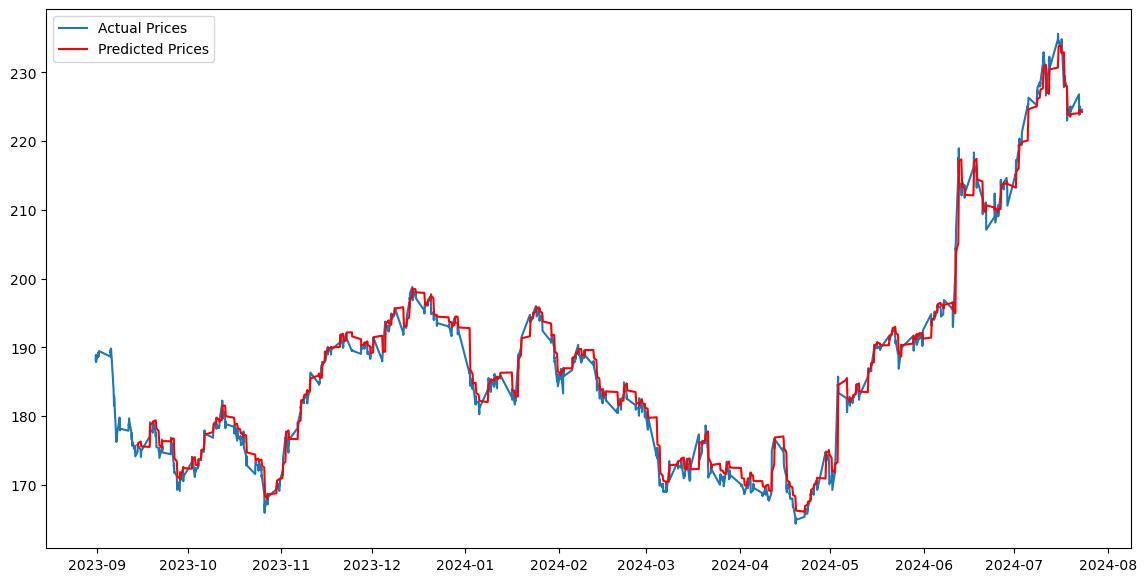

In [46]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load your stock data
data = data[['Close']]

# Data normalization
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, len(scaled_data)):
    X_train.append(scaled_data[i-60:i, 0])
    y_train.append(scaled_data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Building the LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=1))

# Model compilation
model.compile(optimizer='adam', loss='mean_squared_error')

# Model training
model.fit(X_train, y_train, epochs=1, batch_size=1)

# Prediction
test_data = scaled_data[len(scaled_data) - len(X_train) - 60:]
X_test = []
y_test = data[len(data) - len(X_train):].values
for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Visualization
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close'], label='Actual Prices')
plt.plot(data.index[-len(predictions):], predictions, label='Predicted Prices', color='red')
plt.legend()
plt.show()


In [48]:
results = pd.DataFrame({'Date': data.index[-len(predictions):], 'Actual': y_test.flatten(), 'Predicted': predictions.flatten()})
results.set_index('Date', inplace=True)

from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(results['Actual'], results['Predicted'])
rmse = np.sqrt(mean_squared_error(results['Actual'], results['Predicted']))

print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')

print(results.head())

Mean Absolute Error: 1.271065704939271
Root Mean Squared Error: 1.761478845563939
                               Actual   Predicted
Date                                             
2023-09-14 09:30:00-04:00  174.809998  175.828644
2023-09-14 10:30:00-04:00  175.389999  175.695923
2023-09-14 11:30:00-04:00  175.520004  175.677139
2023-09-14 12:30:00-04:00  175.794601  175.744751
2023-09-14 13:30:00-04:00  175.369995  175.887955


[*********************100%%**********************]  1 of 1 completed
C:\Users\AlexMcManus\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 14s 54ms/step - loss: 0.0422
Epoch 2/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - loss: 0.0022
Epoch 3/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - loss: 0.0021
Epoch 4/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - loss: 0.0022
Epoch 5/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - loss: 0.0018
Epoch 6/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - loss: 0.0018
Epoch 7/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - loss: 0.0016
Epoch 8/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - loss: 0.0016
Epoch 9/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - loss: 0.0017
Epoch 10/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 12s 70ms/step - loss: 0.0014
Epoch 11/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - loss: 0.0014
Epoch 12/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - loss: 0.0013
Epoch 13/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - loss: 0.0013
Epoch 14/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 7s 60ms/step - loss: 0.0013
Epoch 15/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 

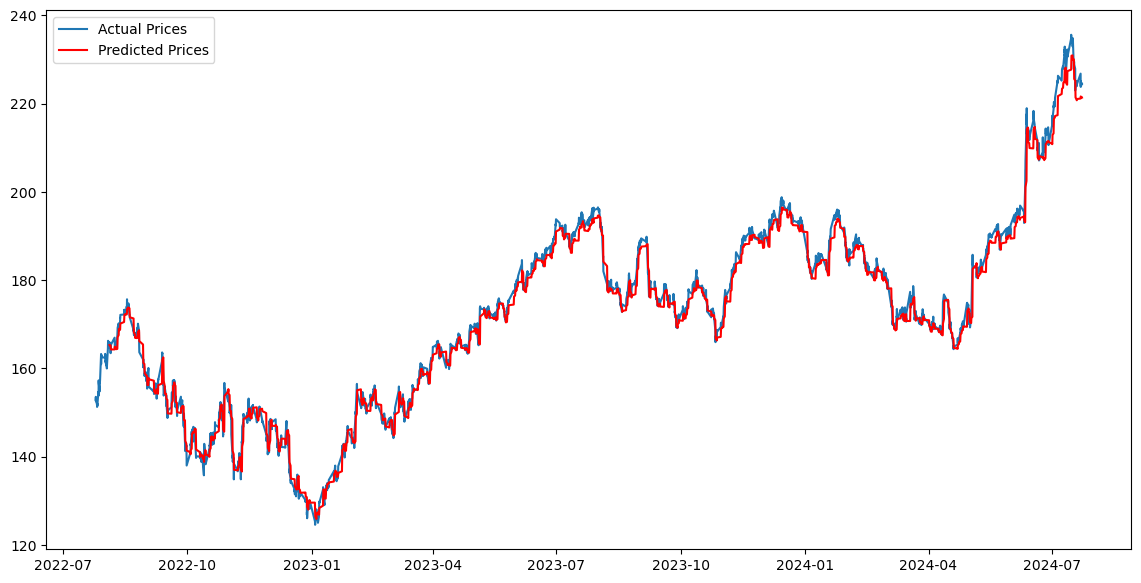

In [56]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load your stock data
data = yf.download(tickers='aapl', period='2y', interval='1h')
data = data[['Close']]

# Data normalization
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, len(scaled_data)):
    X_train.append(scaled_data[i-60:i, 0])
    y_train.append(scaled_data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Building the LSTM with Dropout layers
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Model compilation
model.compile(optimizer='adam', loss='mean_squared_error')

# Model training with more epochs and batch size
model.fit(X_train, y_train, epochs=20, batch_size=32)

# Prepare the test data
test_data = scaled_data[len(scaled_data) - len(X_train) - 60:]
X_test = []
y_test = data[len(data) - len(X_train):].values
for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Create a DataFrame with the actual and predicted values
results = pd.DataFrame({'Date': data.index[-len(predictions):], 'Actual': y_test.flatten(), 'Predicted': predictions.flatten()})
results.set_index('Date', inplace=True)

# Calculate accuracy metrics
mae = mean_absolute_error(results['Actual'], results['Predicted'])
rmse = np.sqrt(mean_squared_error(results['Actual'], results['Predicted']))

print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')

# Display the DataFrame
print(results.head())

# Visualization
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close'], label='Actual Prices')
plt.plot(data.index[-len(predictions):], predictions, label='Predicted Prices', color='red')
plt.legend()
plt.show()


[*********************100%%**********************]  1 of 1 completed
C:\Users\AlexMcManus\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 15s 54ms/step - loss: 0.1963
Epoch 2/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - loss: 0.0239
Epoch 3/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - loss: 0.0219
Epoch 4/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - loss: 0.0198
Epoch 5/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 8s 73ms/step - loss: 0.0188
Epoch 6/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 7s 66ms/step - loss: 0.0172
Epoch 7/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - loss: 0.0168
Epoch 8/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - loss: 0.0167
Epoch 9/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - loss: 0.0144
Epoch 10/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - loss: 0.0137
Epoch 11/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - loss: 0.0132
Epoch 12/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - loss: 0.0129
Epoch 13/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - loss: 0.0129
Epoch 14/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - loss: 0.0126
Epoch 15/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 

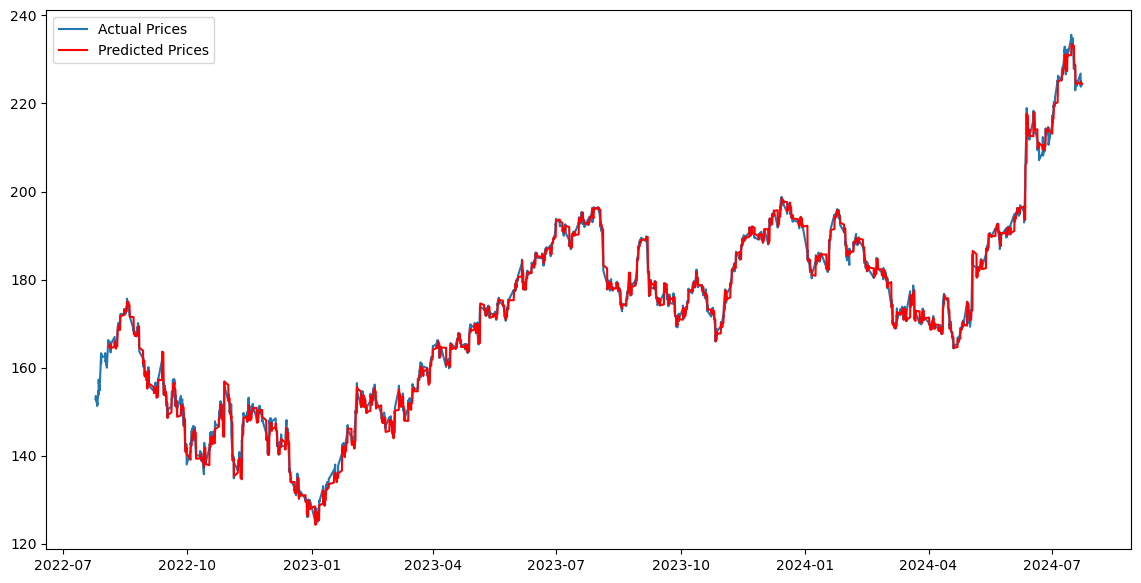

In [58]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load your stock data
data = yf.download(tickers='aapl', period='2y', interval='1h')
data = data[['Close']]

# Data standardization
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, len(scaled_data)):
    X_train.append(scaled_data[i-60:i, 0])
    y_train.append(scaled_data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Building the LSTM with Dropout layers
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Model compilation
model.compile(optimizer='adam', loss='mean_squared_error')

# Model training with more epochs and batch size
model.fit(X_train, y_train, epochs=20, batch_size=32)

# Prepare the test data
test_data = scaled_data[len(scaled_data) - len(X_train) - 60:]
X_test = []
y_test = data[len(data) - len(X_train):].values
for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Create a DataFrame with the actual and predicted values
results = pd.DataFrame({'Date': data.index[-len(predictions):], 'Actual': y_test.flatten(), 'Predicted': predictions.flatten()})
results.set_index('Date', inplace=True)

# Calculate accuracy metrics
mae = mean_absolute_error(results['Actual'], results['Predicted'])
rmse = np.sqrt(mean_squared_error(results['Actual'], results['Predicted']))

print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')

# Display the DataFrame
print(results.head())

# Visualization
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close'], label='Actual Prices')
plt.plot(data.index[-len(predictions):], predictions, label='Predicted Prices', color='red')
plt.legend()
plt.show()


In [60]:
# Take the last 60 time steps from the data for the prediction base
last_60_days = scaled_data[-60:]

predicted_prices = []

# Reshape the last 60 days to be in the same format as our training data
current_sequence = np.reshape(last_60_days, (1, last_60_days.shape[0], 1))

for _ in range(960):  # Predict for 960 future time steps
    next_price_scaled = model.predict(current_sequence)
    predicted_prices.append(next_price_scaled[0, 0])

    # Update the sequence: append the new prediction and remove the oldest data point
    current_sequence = np.append(current_sequence[:, 1:, :], [[next_price_scaled]], axis=1)

# Inverse transform the predicted prices back to the original scale
predicted_prices = scaler.inverse_transform(np.array(predicted_prices).reshape(-1, 1))

future_dates = pd.date_range(start=data.index[-1], periods=961, closed='right', freq='H')

predicted_df = pd.DataFrame(data=predicted_prices, index=future_dates, columns=['Predicted'])

# Plot the actual data and predicted prices
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close'], label='Actual Prices')
plt.plot(predicted_df.index, predicted_df['Predicted'], label='Predicted Prices', color='red')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 3 dimension(s) and the array at index 1 has 4 dimension(s)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━

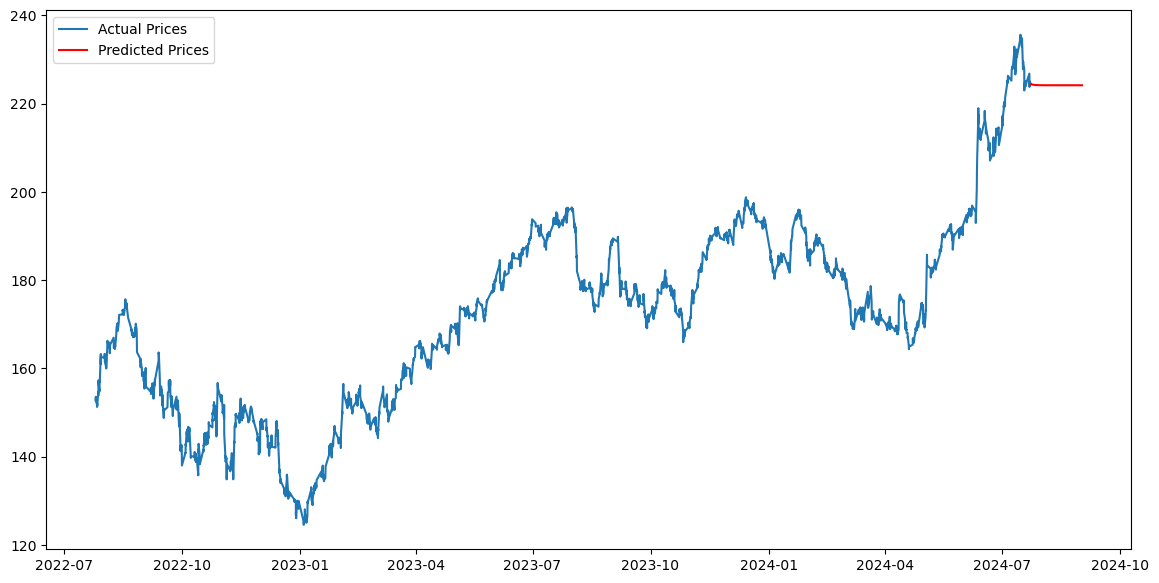

In [64]:
# Initialize the sequence with the most recent data
last_60_days = scaled_data[-60:]
current_sequence = np.reshape(last_60_days, (1, last_60_days.shape[0], 1))

predicted_prices = []

for _ in range(960):  # Predict for 960 future time steps (4 months with 8-hour trading days)
    next_price_scaled = model.predict(current_sequence)
    predicted_prices.append(next_price_scaled[0, 0])
    
    # Update the sequence: append the new prediction and remove the oldest data point
    next_price_scaled_reshaped = np.reshape(next_price_scaled, (1, 1, 1))
    current_sequence = np.append(current_sequence[:, 1:, :], next_price_scaled_reshaped, axis=1)

# Inverse transform the predicted prices back to the original scale
predicted_prices = scaler.inverse_transform(np.array(predicted_prices).reshape(-1, 1))

# Create future dates
future_dates = pd.date_range(start=data.index[-1], periods=961, inclusive='right', freq='H')

# Create a DataFrame for the predicted prices
predicted_df = pd.DataFrame(data=predicted_prices, index=future_dates, columns=['Predicted'])

# Plot the actual data and predicted prices
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close'], label='Actual Prices')
plt.plot(predicted_df.index, predicted_df['Predicted'], label='Predicted Prices', color='red')
plt.legend()
plt.show()


In [68]:
print(predicted_df)

                            Predicted
2024-07-23 11:30:00-04:00  224.414124
2024-07-23 12:30:00-04:00  224.405716
2024-07-23 13:30:00-04:00  224.402802
2024-07-23 14:30:00-04:00  224.402008
2024-07-23 15:30:00-04:00  224.401627
...                               ...
2024-09-01 06:30:00-04:00  224.160675
2024-09-01 07:30:00-04:00  224.160675
2024-09-01 08:30:00-04:00  224.160675
2024-09-01 09:30:00-04:00  224.160675
2024-09-01 10:30:00-04:00  224.160675

[960 rows x 1 columns]
